### Heart Disease indicator Dataset
#### Abstract
#### AutoML:

Auto ml selects the best model for our dataset by evaluating many models for us.

Here below we are going to use AUTOML to predict the gender of person using other variables such as BMI, smoking,Alcohol drinking, Stroke etc (ie: multiple classification will be done here).

By performing automl we will get the imp variables and the most effective model for our dataset as well.

In [1]:
#Installing H20
!pip install h2o

In [2]:
# import the library
# importing H20 automl 
#It can do data prepossesing it self like categorical encoding coversion etc. 
#So there is no need to create duplicates and can take care of missing value imputation and other data cleaning activities.
#mine
import h2o
from h2o.automl import H2OAutoML
import os
import pandas as pd

In [3]:
h2o.init()
#It starts the H2o clusters

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,4 hours 11 mins
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,12 days
H2O_cluster_name:,H2O_from_python_nikhilbindal_6t9qnj
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,1.968 Gb
H2O_cluster_total_cores:,4
H2O_cluster_allowed_cores:,4
H2O_cluster_status:,"locked, healthy"


In [13]:
#Reading the Dataset and Displaying the head of it.
data=pd.read_csv("./heart_2020_cleaned.csv", sep = ",")
data.name = "data"
data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


In [5]:
#checking correlation between variables
data.corr().unstack().sort_values().drop_duplicates()

city_development_index  target                   -0.341665
enrollee_id             city_development_index   -0.040455
training_hours          target                   -0.021577
enrollee_id             training_hours            0.000998
city_development_index  training_hours            0.001920
enrollee_id             target                    0.049475
                        enrollee_id               1.000000
dtype: float64

In [14]:
#Importing our dataset with H2O.
df = h2o.import_file('./heart_2020_cleaned.csv')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [15]:
df.types

{'HeartDisease': 'enum',
 'BMI': 'real',
 'Smoking': 'enum',
 'AlcoholDrinking': 'enum',
 'Stroke': 'enum',
 'PhysicalHealth': 'int',
 'MentalHealth': 'int',
 'DiffWalking': 'enum',
 'Sex': 'enum',
 'AgeCategory': 'enum',
 'Race': 'enum',
 'Diabetic': 'enum',
 'PhysicalActivity': 'enum',
 'GenHealth': 'enum',
 'SleepTime': 'int',
 'Asthma': 'enum',
 'KidneyDisease': 'enum',
 'SkinCancer': 'enum'}

In [16]:
df.describe()

Rows:319795
Cols:18

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
type,enum,real,enum,enum,enum,int,int,enum,enum,enum,enum,enum,enum,enum,int,enum,enum,enum
mins,,12.02,,,,0.0,0.0,,,,,,,,1.0,,,
mean,,28.325398520927457,,,,3.371710001719859,3.898366140808957,,,,,,,,7.097074688472298,,,
maxs,,94.85,,,,30.0,30.0,,,,,,,,24.0,,,
sigma,,6.356100200470744,,,,7.950850182571366,7.95523521894361,,,,,,,,1.4360070609642848,,,
zeros,,0,,,,226589,205401,,,,,,,,0,,,
missing,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
0,No,16.6,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No


In [17]:
#Splitting our dataset into 3 datasets, one for training, other for testing and last one for validation purposes. (0.7,0.15,0.15 split)
df_train,df_test,df_valid = df.split_frame(ratios=[.7, .15])

In [18]:
df_train

HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
No,16.6,Yes,No,No,3,30,No,Female,55-59,White,Yes,Yes,Very good,5,Yes,No,Yes
No,20.34,No,No,Yes,0,0,No,Female,80 or older,White,No,Yes,Very good,7,No,No,No
Yes,28.87,Yes,No,No,6,0,Yes,Female,75-79,Black,No,No,Fair,12,No,No,No
No,21.63,No,No,No,15,0,No,Female,70-74,White,No,Yes,Fair,4,Yes,No,Yes
No,31.64,Yes,No,No,5,0,Yes,Female,80 or older,White,Yes,No,Good,9,Yes,No,No
No,26.45,No,No,No,0,0,No,Female,80 or older,White,"No, borderline diabetes",No,Fair,5,No,Yes,No
No,40.69,No,No,No,0,0,Yes,Male,65-69,White,No,Yes,Good,10,No,No,No
Yes,34.3,Yes,No,No,30,0,Yes,Male,60-64,White,Yes,No,Poor,15,Yes,No,No
No,28.71,Yes,No,No,0,0,No,Female,55-59,White,No,Yes,Very good,5,No,No,No
No,28.37,Yes,No,No,0,0,Yes,Male,75-79,White,Yes,Yes,Very good,8,No,No,No


In [19]:
#Removing target variable from dataset. to create input varaibles and output (or) target variable.
y = "HeartDisease"
x = df.columns
x.remove(y)

In [20]:
#Using H2O automl
#Setting models thresold to "10", more models we use it takes more time to come up with the best model and hyperparameters. 
#To create a simpler model we are excluding "StackedEnsemble" and "DeepLearning", tho they are really good. 
aml = H2OAutoML(max_models = 10, seed = 10, exclude_algos = ["StackedEnsemble", "DeepLearning"], verbosity="info", nfolds=0)
#taken from references

In [21]:
#starting the automl process
#It will test all the 10 models and update the leading model according to performance.
#We can see for the variable importance at the end as well. Gives us rough Idea of which 
#variable will it be using for the prediction purposes. 
aml.train(x = x, y = y, training_frame = df_train, validation_frame=df_valid)
#taken from references

AutoML progress: |
21:28:40.63: Project: AutoML_3_20221108_212840
21:28:40.64: Cross-validation disabled by user: no fold column nor nfolds > 1.
21:28:40.64: Setting stopping tolerance adaptively based on the training frame: 0.0021133668599572068
21:28:40.64: Build control seed: 10
21:28:40.64: training frame: Frame key: AutoML_3_20221108_212840_training_py_10_sid_b108    cols: 18    rows: 223898  chunks: 16    size: 2454836  checksum: 5119352645841490734
21:28:40.65: validation frame: Frame key: py_12_sid_b108    cols: 18    rows: 47867  chunks: 16    size: 643537  checksum: 7923063591121785633
21:28:40.65: leaderboard frame: Frame key: py_12_sid_b108    cols: 18    rows: 47867  chunks: 16    size: 643537  checksum: 7923063591121785633
21:28:40.65: blending frame: NULL
21:28:40.65: response column: HeartDisease
21:28:40.65: fold column: null
21:28:40.65: weights column: null
21:28:40.80: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4

Model Details
=============
H2OGradientBoostingEstimator : Gradient Boosting Machine
Model Key: GBM_2_AutoML_3_20221108_212840


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    60                 60                          82587                  7            7            6.88333       1             126           104.983

ModelMetricsBinomial: gbm
** Reported on train data. **

MSE: 0.06235065757957192
RMSE: 0.24970113652038495
LogLoss: 0.2162922799323176
Mean Per-Class Error: 0.2818640244158738
AUC: 0.8576394651442227
AUCPR: 0.42026254210495456
Gini: 0.7152789302884455

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21090732948169086
       No      Yes    Error    Rate
-----  ------  -----  -------  ------------------
No     187394  17312  0.0846   (17312.0/204706.0)
Yes    9196    9996   0.4792   (9196.0/19192.0)
Total  196590  27308  0.1184   (26508.0/223898.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.210907     0.429935  201
max f2                       0.109087     0.541397  275
max f0point5                 0.354284     0.446664  128
max accuracy                 0.462614     0.920433  85
max precision                0.937222     1         0
max recall                   0.00473561   1         398
max specificity              0.937222     1         0
max absolute_mcc             0.210907     0.373213  201
max min_per_class_accuracy   0.101955     0.775292  281
max mean_per_class_accuracy  0.0859754    0.777022  294
max tns                      0.937222     204706    0
max fns                      0.937222     19189     0
max fps                      0.00421379   204706    399
max tps                      0.00473561   19192     398
max tnr                      0.937222     1         0
max fnr                      0.937222     0.999844  0
max fpr                      0.00421379   1         399
max tpr                      0.00473561   1         398

Gains/Lift Table: Avg response rate:  8.57 %, avg score:  8.58 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.544574           8.78483    8.78483            0.753015         0.633567    0.753015                    0.633567            0.0878491       0.0878491                  778.483   778.483            0.0851477
2        0.0200002                   0.462676           6.46618    7.62551            0.554265         0.499163    0.65364                     0.566365            0.0646624       0.152511                   546.618   662.551            0.144935
3        0.0300003                   0.41058            5.49703    6.91601            0.471192         0.434684    0.592824                    0.522472            0.0549708       0.207482                   449.703   591.601            0.194122
4        0.0400004                   0.373293           4.6321     6.34504            0.397052         0.390819    0.543881                    0.489558            0.0463214       0.253804                   363.21    534.504            0.233848
5        0.0500004                   0.340745           4.30384    5.9368             0.368915         0.3

In [22]:
#Creates the leader Board for all out models, ranking them by their performance(default: mean_per_class_error	)
#We can also observe that as we go below the leaderboard the logloss, rmse and mse are increasing as well. 
#Here from the leaderboard we have "GBM_5_AutoML_1_20221107_231030	" as the leader(best performing) model .

lb = aml.leaderboard

In [23]:
lb.head()

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
GBM_2_AutoML_3_20221108_212840,0.84459,0.227274,0.344397,0.267556,0.257437,0.0662736
GBM_3_AutoML_3_20221108_212840,0.843878,0.227919,0.338493,0.272468,0.257979,0.0665531
XGBoost_3_AutoML_3_20221108_212840,0.843579,0.227628,0.343459,0.276189,0.257627,0.0663719
GBM_4_AutoML_3_20221108_212840,0.841016,0.229327,0.338145,0.289268,0.258507,0.0668257
GLM_1_AutoML_3_20221108_212840,0.840345,0.229809,0.340574,0.278193,0.258375,0.0667578
GBM_1_AutoML_3_20221108_212840,0.839758,0.2295,0.336907,0.285513,0.25845,0.0667963
XGBoost_2_AutoML_3_20221108_212840,0.83703,0.231889,0.325112,0.28651,0.26002,0.0676105
XRT_1_AutoML_3_20221108_212840,0.834391,0.235813,0.32865,0.279346,0.260424,0.0678206
XGBoost_1_AutoML_3_20221108_212840,0.829586,0.236668,0.311399,0.280775,0.262507,0.0689097
DRF_1_AutoML_3_20221108_212840,0.826372,0.237241,0.311899,0.295128,0.261893,0.0685882


In [24]:
#Using the leader model for prediction. 
OverWeight_pred=aml.leader.predict(df_test)
#taken from references

gbm prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [25]:
OverWeight_pred.head()
#predicitions

predict,No,Yes
No,0.985609,0.0143905
No,0.938227,0.0617734
No,0.863413,0.136587
No,0.869415,0.130585
No,0.985219,0.014781
Yes,0.82308,0.17692
Yes,0.680419,0.319581
Yes,0.803622,0.196378
No,0.941121,0.0588793
No,0.856496,0.143504


In [26]:
aml.leader.model_performance(df_test)
#creating a performance report for the leading model (GBM_5_AutoML_1_20221107_231030)

ModelMetricsBinomial: gbm
** Reported on test data. **

MSE: 0.06421168735086555
RMSE: 0.2534002512841405
LogLoss: 0.2219595592380514
Mean Per-Class Error: 0.29638109903264
AUC: 0.8446787122854429
AUCPR: 0.34711474875913134
Gini: 0.6893574245708858

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.1999965081240496
       No     Yes    Error    Rate
-----  -----  -----  -------  ----------------
No     39873  4125   0.0938   (4125.0/43998.0)
Yes    2012   2020   0.499    (2012.0/4032.0)
Total  41885  6145   0.1278   (6137.0/48030.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.199997     0.396974  202
max f2                       0.0910592    0.525582  287
max f0point5                 0.311669     0.397887  141
max accuracy                 0.532626     0.917364  54
max precision                0.853592     1         0
max recall                   0.00415997   1         399
max specificity              0.853592     1         0
max absolute_mcc             0.161938     0.341302  229
max min_per_class_accuracy   0.0980873    0.765377  281
max mean_per_class_accuracy  0.0802957    0.771138  296
max tns                      0.853592     43998     0
max fns                      0.853592     4031      0
max fps                      0.00415997   43998     399
max tps                      0.00415997   4032      399
max tnr                      0.853592     1         0
max fnr                      0.853592     0.999752  0
max fpr                      0.00415997   1         399
max tpr                      0.00415997   1         399

Gains/Lift Table: Avg response rate:  8.39 %, avg score:  8.48 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100146                   0.540076           6.58762    6.58762            0.553015         0.621643    0.553015                    0.621643            0.0659722       0.0659722                  558.762   558.762            0.0610856
2        0.0200083                   0.460537           5.58384    6.08626            0.46875          0.495912    0.510926                    0.558843            0.0558036       0.121776                   458.384   508.626            0.111093
3        0.0300021                   0.406546           5.43494    5.8693             0.45625          0.431743    0.492713                    0.516506            0.0543155       0.176091                   443.494   486.93             0.159477
4        0.0400167                   0.367646           4.60638    5.55324            0.386694         0.386888    0.466181                    0.484068            0.046131        0.222222                   360.638   455.324            0.198903
5        0.0500104                   0.335627           4.39262    5.32131            0.36875          0.351412    0.446711                    0.457559            0.0438988       0.266121                   339.262   432.131            0.235915
6        0.1                         0.2366             3.2993     4.31052            0.276968         0.280744    0.361857                    0.36917             0.164931        0.431052                   229.93    331.052            0.361389
7        0.15001                     0.176148           2.38542    3.66873            0.20025          0.20395     0.307981                    0.314089            0.119296        0.550347                   138.542   266.873            0.4370

In [27]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [28]:
model_ids

['GBM_2_AutoML_3_20221108_212840',
 'GBM_3_AutoML_3_20221108_212840',
 'XGBoost_3_AutoML_3_20221108_212840',
 'GBM_4_AutoML_3_20221108_212840',
 'GLM_1_AutoML_3_20221108_212840',
 'GBM_1_AutoML_3_20221108_212840',
 'XGBoost_2_AutoML_3_20221108_212840',
 'XRT_1_AutoML_3_20221108_212840',
 'XGBoost_1_AutoML_3_20221108_212840',
 'DRF_1_AutoML_3_20221108_212840']

In [39]:
#Using confusion matrix
aml.leader.confusion_matrix()

,No,Yes,Error,Rate
No,187394.0,17312.0,0.0846,(17312.0/204706.0)
Yes,9196.0,9996.0,0.4792,(9196.0/19192.0)
Total,196590.0,27308.0,0.1184,(26508.0/223898.0)


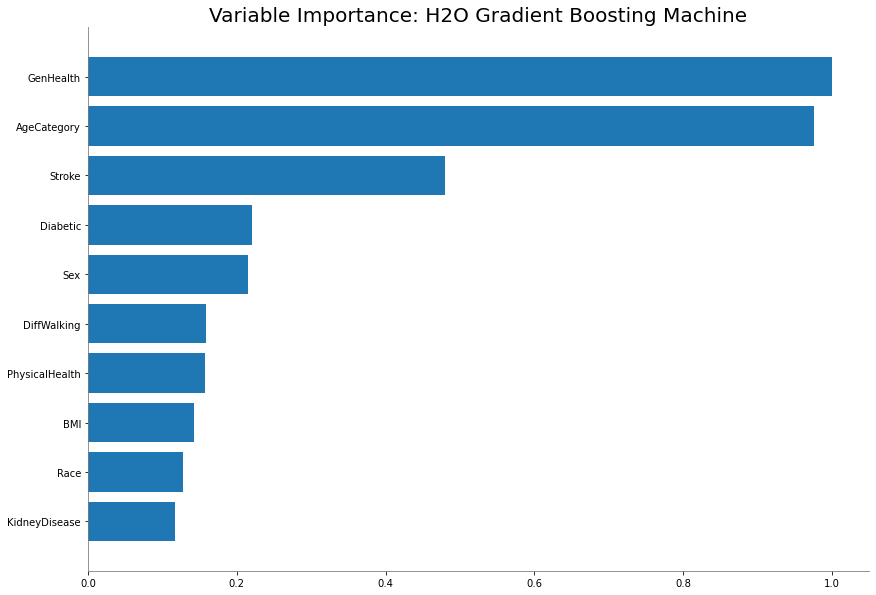

<Figure size 432x288 with 0 Axes>

In [30]:
aml.leader.varimp_plot()
#variance importance plot for the leader model.
#taken from references

In [31]:
h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])
#we are using xgboost model as well to predict, while it's still not in the top of the aml leader board.

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_3_20221108_212840


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.06395236788288416
RMSE: 0.2528880540533383
LogLoss: 0.22035946660347489
Mean Per-Class Error: 0.29272633188266417
AUC: 0.8519084415463216
AUCPR: 0.3814190648417427
Gini: 0.7038168830926432

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21242088954735622
       No      Yes    Error    Rate
-----  ------  -----  -------  ------------------
No     187064  17642  0.0862   (17642.0/204706.0)
Yes    9582    9610   0.4993   (9582.0/19192.0)
Total  196646  27252  0.1216   (27224.0/223898.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.212421     0.413832  199
max f2                       0.101801     0.533884  278
max f0point5                 0.324551     0.414841  138
max accuracy                 0.48712      0.917806  74
max precision                0.923032     1         0
max recall                   0.00238551   1         398
max specificity              0.923032     1         0
max absolute_mcc             0.197742     0.356064  208
max min_per_class_accuracy   0.101801     0.769591  278
max mean_per_class_accuracy  0.0930588    0.772538  286
max tns                      0.923032     204706    0
max fns                      0.923032     19191     0
max fps                      0.00189072   204706    399
max tps                      0.00238551   19192     398
max tnr                      0.923032     1         0
max fnr                      0.923032     0.999948  0
max fpr                      0.00189072   1         399
max tpr                      0.00238551   1         398

Gains/Lift Table: Avg response rate:  8.57 %, avg score:  8.58 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.545439           7.66458    7.66458            0.65699          0.636009    0.65699                     0.636009            0.0766465       0.0766465                  666.458   666.458            0.0728948
2        0.0200002                   0.463388           5.94513    6.80486            0.509603         0.500047    0.583296                    0.568028            0.0594519       0.136098                   494.513   580.486            0.126983
3        0.0300003                   0.411204           5.15314    6.25429            0.441715         0.435676    0.536102                    0.523911            0.0515319       0.18763                    415.314   525.429            0.172408
4        0.0400048                   0.370372           4.76023    5.88065            0.408036         0.390164    0.504075                    0.490463            0.047624        0.235254                   376.023   488.065            0.213555
5        0.0500004                   0.339746           3.97214    5.49912            0.340483         0.354173    0.471371                    0.463217            0.039704        0.274958                   297.214   449.912            0.246049
6        0.100001                    0.23984            3.37846    4.43879            0.289594         0.283786    0.380482                    0.373501            0.168925        0.443883                   237.846   343.879            0.376122
7        0.150024                    0.180509   

In [32]:
out = h2o.get_model([mid for mid in model_ids if "XGBoost" in mid][0])

In [33]:
out.params

{'model_id': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'ModelKeyV3',
    'schema_type': 'Key<Model>'},
   'name': 'XGBoost_3_AutoML_3_20221108_212840',
   'type': 'Key<Model>',
   'URL': '/3/Models/XGBoost_3_AutoML_3_20221108_212840'},
  'input': None},
 'training_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221108_212840_training_py_10_sid_b108',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221108_212840_training_py_10_sid_b108'},
  'input': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    'schema_type': 'Key<Frame>'},
   'name': 'AutoML_3_20221108_212840_training_py_10_sid_b108',
   'type': 'Key<Frame>',
   'URL': '/3/Frames/AutoML_3_20221108_212840_training_py_10_sid_b108'}},
 'validation_frame': {'default': None,
  'actual': {'__meta': {'schema_version': 3,
    'schema_name': 'FrameKeyV3',
    's

In [34]:
out.convert_H2OXGBoostParams_2_XGBoostParams()

({'silent': True,
  'eta': 0.3,
  'colsample_bylevel': 0.8,
  'objective': 'binary:logistic',
  'min_child_weight': 3.0,
  'nthread': 4,
  'seed': 18,
  'max_depth': 5,
  'colsample_bytree': 0.8,
  'lambda': 1.0,
  'gamma': 0.0,
  'alpha': 0.0,
  'booster': 'gbtree',
  'grow_policy': 'depthwise',
  'nround': 10000,
  'subsample': 0.8,
  'max_delta_step': 0.0,
  'tree_method': 'exact'},
 10000)

In [35]:
out

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_3_AutoML_3_20221108_212840


Model Summary: 
    number_of_trees
--  -----------------
    55

ModelMetricsBinomial: xgboost
** Reported on train data. **

MSE: 0.06395236788288416
RMSE: 0.2528880540533383
LogLoss: 0.22035946660347489
Mean Per-Class Error: 0.29272633188266417
AUC: 0.8519084415463216
AUCPR: 0.3814190648417427
Gini: 0.7038168830926432

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.21242088954735622
       No      Yes    Error    Rate
-----  ------  -----  -------  ------------------
No     187064  17642  0.0862   (17642.0/204706.0)
Yes    9582    9610   0.4993   (9582.0/19192.0)
Total  196646  27252  0.1216   (27224.0/223898.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.212421     0.413832  199
max f2                       0.101801     0.533884  278
max f0point5                 0.324551     0.414841  138
max accuracy                 0.48712      0.917806  74
max precision                0.923032     1         0
max recall                   0.00238551   1         398
max specificity              0.923032     1         0
max absolute_mcc             0.197742     0.356064  208
max min_per_class_accuracy   0.101801     0.769591  278
max mean_per_class_accuracy  0.0930588    0.772538  286
max tns                      0.923032     204706    0
max fns                      0.923032     19191     0
max fps                      0.00189072   204706    399
max tps                      0.00238551   19192     398
max tnr                      0.923032     1         0
max fnr                      0.923032     0.999948  0
max fpr                      0.00189072   1         399
max tpr                      0.00238551   1         398

Gains/Lift Table: Avg response rate:  8.57 %, avg score:  8.58 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0100001                   0.545439           7.66458    7.66458            0.65699          0.636009    0.65699                     0.636009            0.0766465       0.0766465                  666.458   666.458            0.0728948
2        0.0200002                   0.463388           5.94513    6.80486            0.509603         0.500047    0.583296                    0.568028            0.0594519       0.136098                   494.513   580.486            0.126983
3        0.0300003                   0.411204           5.15314    6.25429            0.441715         0.435676    0.536102                    0.523911            0.0515319       0.18763                    415.314   525.429            0.172408
4        0.0400048                   0.370372           4.76023    5.88065            0.408036         0.390164    0.504075                    0.490463            0.047624        0.235254                   376.023   488.065            0.213555
5        0.0500004                   0.339746           3.97214    5.49912            0.340483         0.354173    0.471371                    0.463217            0.039704        0.274958                   297.214   449.912            0.246049
6        0.100001                    0.23984            3.37846    4.43879            0.289594         0.283786    0.380482                    0.373501            0.168925        0.443883                   237.846   343.879            0.376122
7        0.150024                    0.180509   

In [40]:
#confusuion matrix for xgboost method
out.confusion_matrix()

,No,Yes,Error,Rate
No,187064.0,17642.0,0.0862,(17642.0/204706.0)
Yes,9582.0,9610.0,0.4993,(9582.0/19192.0)
Total,196646.0,27252.0,0.1216,(27224.0/223898.0)


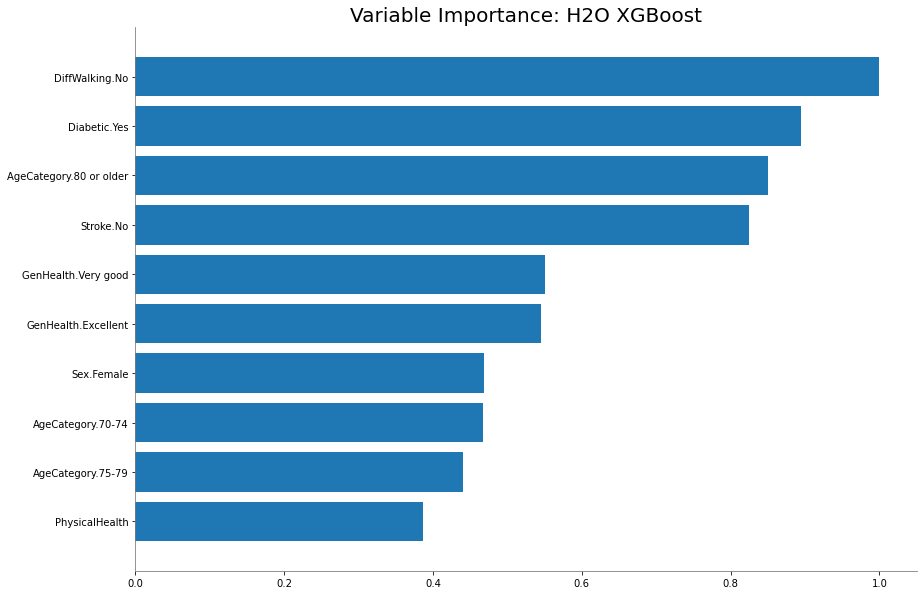

<Figure size 432x288 with 0 Axes>

In [37]:
out.varimp_plot()

**Conclusion**

**Evaluation:**  We can evaluate our model by using the above confusion matrix from it we can say that the error and rate of error in the cofusion matrix are significantly low suggesting that the model is working perfectly. 

Also while evaluating all the model we can see that present leader model has the least amount of **mean_per_class_error** and **log loss** as well. Which also suggests that our model fuctions perfectly.

The model also gives the most important variables as "DiffWalking.No", "Diabetic.Yes", "AgeCategory.80 or Older" suggesting heart disease dependence on it. Also we know since the model thats involved GBM handles Overfitting finely as well. Probably the reason h2o choose it in the first place.

**1. Is the relationship significant?**

Statistical significance means that there is a good chance that we are right in finding that a relationship exists between two variables. We can observe from above that the dependent variable is dependent on variables such as DiffWalking, Diabetic, Stroke, AgeCategory. We can suggest that the relation ship is significant btw the dependant and independent variables.

**2. Are any model assumptions violated?**

To answer the above question we need to know answer to the below questions.

What Are the Assumptions of GBM(Gradient boosting model)?
1) Independence of observations

2) Assumptions related to the interaction depth. If set to 1, strictly additive model is assumed. As we increase the interaction depth, this assumption is relaxed.

What Are the Assumptions of XGBoost?

1)XGBoost may assume that encoded integer values for each input variable have an ordinal relationship
2)XGBoost assume that your data may not be complete (i.e. it can deal with missing values)

So from above we can say, that every while many variables are real in nature still they can be assumed into finite interval, there by it won't be problem assuming it is ordinal. Similary for GBM model every observation in the dataset as we know are differnt and not dependent on other observations as well. 

So, no assumptions of either GBM or XGBoost model are Violated here.

**3. Is there any multicollinearity in the model?**

Multicollinearity occurs when two or more independent variables are highly correlated with one another in a  model. As we could see that there is so much colienarity between Physical Health and DiffWalking, Mental health and Physical health.

**4. In the multivariate models are predictor variables independent of all the other predictor variables?**

From above correlation we can see that these variables are the one with correlation. and Independent variables have both zero covariance and correlation. While they may be dependent on each other a bit, It its still not significant enough to call them dependent variables.

**5. In in multivariate models rank the most significant predictor variables and exclude insignificant ones from the model.**

**Most Importatnt Variables: **
1. DiffWalking.No
2. Diabetic.Yes
3. AgeCategory80orOlder
4. Stroke.No


are the most importatnt variables for predicitng the Heart diesases better.

**6. Does the model make sense?**

Yes as we can see that the obesity level depending on "DiffWalking.No", "Diabetic.Yes", etc we can undersatad that the model in sensible.

**7. Does regularization help?**

Regularization helps by ignificantly reducing the variance of the model, without substantial increase in its bias. it is reducing the variance(hence avoiding overfitting), without loosing any important properties in the data.

**8. Which independent variables are significant?**

DiffWalking.No, Diabetic.Yes are the significant variables of all.
Esp Total day charge is the most significant variable.

**9. Which hyperparameters are important?**

max_models and exclude_algos are the most important hyperparameters as they save us a lot of time here. 

**Reference**:

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_lending_club.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_H2O_automl_model.ipynb

https://github.com/aiskunks/Skunks_Skool/blob/main/INFO_6105/6105/6105_Airlines_GBM_AutoML.ipynb